# Laboratorio 01 – Series de Tiempo  
**CC3084 – Data Science**, Semestre II 2025  
**Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
**Guatemala, Julio 2025**


In [17]:
import pandas as pd

file_path = './Estadisticas_historicas_comercializacion.xlsx'

df = pd.read_excel(file_path, sheet_name=0, header=6)
df = df.dropna(axis=1, how='all')
df.columns = df.columns.str.strip()
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
df = df[df['Fecha'].notna()].reset_index(drop=True)

df.head()






,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.738095,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402.0,0.0,715344.0,2.312639e+06
1,2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.380952,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0.0,0.0,370166.0,1.769209e+06
2,2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.371429,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0.0,0.0,360530.0,1.945770e+06
3,2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.642857,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184.0,0.0,359527.0,1.623638e+06
4,2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.861905,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680.0,0.0,723346.0,2.262727e+06


Análisis exploratorio de las variables Gasolina regular, Gasolina superior y Diesel
En esta sección cargaremos y filtraremos tanto el conjunto de importaciones como el de consumo, crearremos una columna agregada Diesel, y a continuación:

Obtendremos estadísticas descriptivas de cada variable.

Exploraremos su distribución con histogramas y curvas KDE.

Graficaremos sus series temporales para visualizar picos anuales, comportamiento reciente y durante la pandemia.

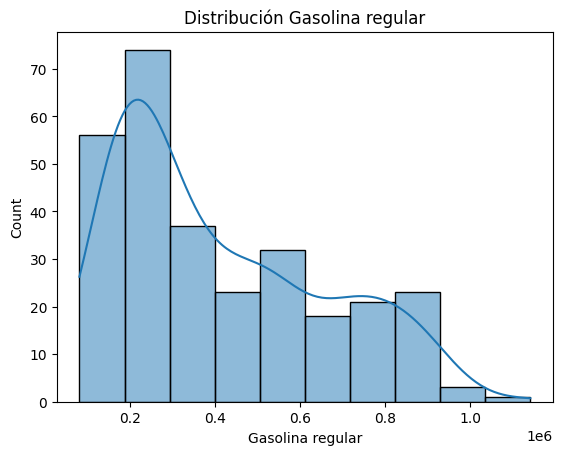

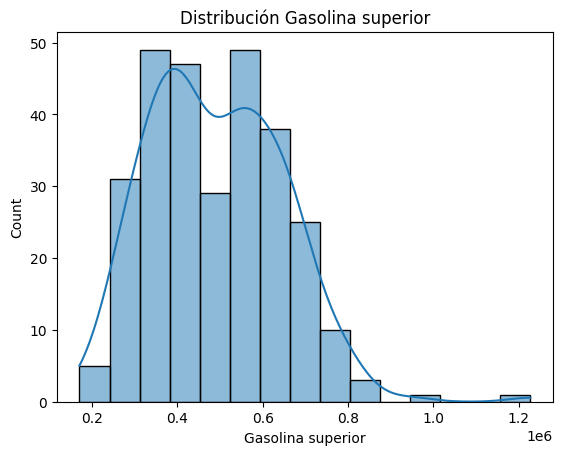

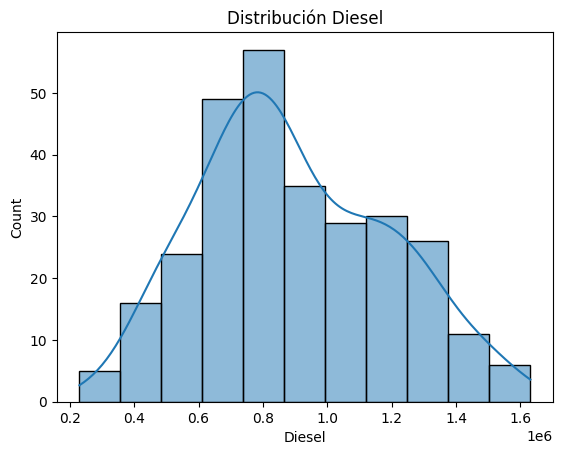

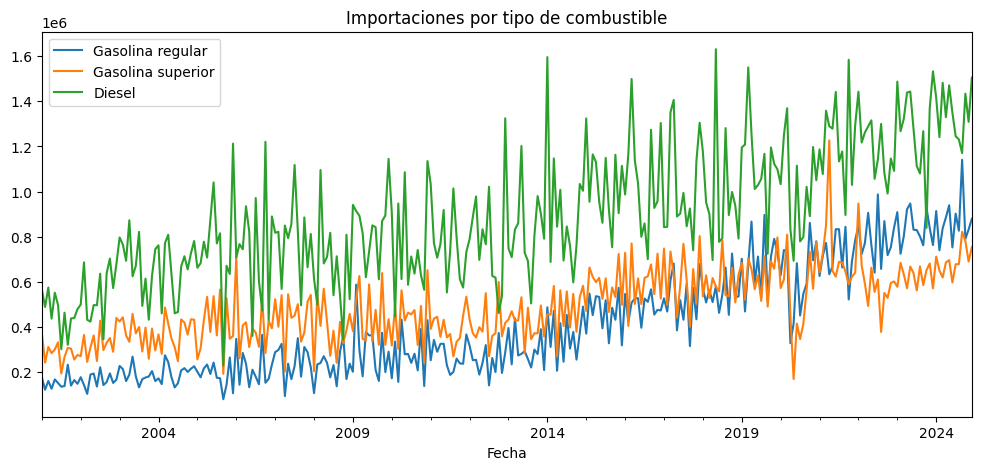

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Diesel'] = df['Diesel bajo azufre'] + df['Diesel ultra bajo azufre'] + df['Diesel alto azufre']
imp = df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel']]

imp[['Gasolina regular', 'Gasolina superior', 'Diesel']].describe()

for col in ['Gasolina regular', 'Gasolina superior', 'Diesel']:
    sns.histplot(imp[col], kde=True)
    plt.title(f'Distribución {col}')
    plt.show()

imp.set_index('Fecha').plot(figsize=(12,5), title='Importaciones por tipo de combustible')
plt.show()
